# 20_Newsgroup Project by Silky (B.Tech. IT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import re
import string
import random
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics    
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fetching and Displaying Dataset

In [2]:
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), 
                                  shuffle=True, random_state=42)
df_full = pd.DataFrame()
df_full['news'] = dataset.data
df_full['source'] = dataset.target

In [3]:
df_full.head()

,news,source
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [4]:
label=[]
for i in df_full['source']:
    label.append(dataset.target_names[i])
df_full['label']=label

In [5]:
df_full.label

0                rec.sport.hockey
1        comp.sys.ibm.pc.hardware
2           talk.politics.mideast
3        comp.sys.ibm.pc.hardware
4           comp.sys.mac.hardware
5                 sci.electronics
6           comp.sys.mac.hardware
7                rec.sport.hockey
8                rec.sport.hockey
9              talk.religion.misc
10             talk.religion.misc
11                      sci.crypt
12             talk.religion.misc
13                        sci.med
14                    alt.atheism
15          talk.politics.mideast
16                sci.electronics
17                sci.electronics
18                      sci.crypt
19                rec.motorcycles
20                      rec.autos
21                 comp.windows.x
22                  comp.graphics
23                rec.motorcycles
24               rec.sport.hockey
25                      sci.space
26             talk.politics.guns
27                  comp.graphics
28                   misc.forsale
29            

In [6]:
df_full.head()

,news,source,label
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


Training Dataset

In [7]:
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                   shuffle=True, random_state=42)
df_train = pd.DataFrame()
df_train['news'] = train.data
df_train['source'] = train.target


In [8]:
df_train.head()

,news,source
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [9]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
train.data[7]

u'                                                                      \nALL this shows is that YOU don\'t know much about SCSI.\n\nSCSI-1 {with a SCSI-1 controler chip} range is indeed 0-5MB/s\nand that is ALL you have right about SCSI\nSCSI-1 {With a SCSI-2 controller chip}: 4-6MB/s with 10MB/s burst {8-bit}\n Note the INCREASE in SPEED, the Mac Quadra uses this version of SCSI-1\n so it DOES exist. Some PC use this set up too.\nSCSI-2 {8-bit/SCSI-1 mode}:          4-6MB/s with 10MB/s burst\nSCSI-2 {16-bit/wide or fast mode}:  8-12MB/s with 20MB/s burst\nSCSI-2 {32-bit/wide AND fast}:     15-20MB/s with 40MB/s burst\n \nBy your OWN data the "Although SCSI is twice as fast as ESDI" is correct\nWith a SCSI-2 controller chip SCSI-1 can reach 10MB/s which is indeed\n"20% faster than IDE" {120% of 8.3 is 9.96}. ALL these SCSI facts have been\nposted to this newsgroup in my Mac & IBM info sheet {available by FTP on \nsumex-aim.stanford.edu (36.44.0.6) in the info-mac/report as \nmac-ibm-c

In [11]:
np.bincount(train.target)

array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
       594, 593, 599, 546, 564, 465, 377], dtype=int64)

Displaying training dataset target label in Dataframe

In [12]:
label=[]
for i in df_train['source']:
    label.append(train.target_names[i])
df_train['label']=label

In [13]:
df_train.head()

,news,source,label
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


Testing Dataset

In [14]:
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), 
                                  shuffle=True, random_state=42)
df_test = pd.DataFrame()
df_test['news'] = test.data
df_test['source'] = test.target

In [15]:
df_test.head()

,news,source
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [16]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
test.data[0]

u'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.'

In [18]:
np.bincount(test.target)

array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
       396, 394, 398, 364, 376, 310, 251], dtype=int64)

Displaying Testing Dataset target label in Dataframe

In [19]:
label=[]
for i in df_test['source']:
    label.append(test.target_names[i])
df_test['label']=label

In [20]:
df_test.head()

,news,source,label
0,I am a little confused on all of the models of...,7,rec.autos
1,I'm not familiar at all with the format of the...,5,comp.windows.x
2,"\nIn a word, yes.\n",0,alt.atheism
3,\nThey were attacking the Iraqis to drive them...,17,talk.politics.mideast
4,\nI've just spent two solid months arguing tha...,19,talk.religion.misc


Cleaning News Data

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

stopWords = set(stopwords.words('english'))

def textcleaner_lemmas(news):
    
    cleaner = re.sub(r"[^a-zA-Z ]+", ' ', news.lower()) # Lowercase and strip everything except words
    
    cleaner = word_tokenize(cleaner)
    ps = PorterStemmer()
    clean = []
    for w in cleaner:
        
        if w not in stopWords:
            
            if len(w)>2:
                
                clean.append(lemmatizer.lemmatize(w))
    return ' '.join(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df_full['clean_text'] = df_full.news.apply(lambda x: textcleaner_lemmas(x))
df_train['clean_text'] = df_train.news.apply(lambda x: textcleaner_lemmas(x))
df_test['clean_text'] = df_test.news.apply(lambda x: textcleaner_lemmas(x))

In [23]:
df_train.head()

,news,source,label,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,wondering anyone could enlighten car saw day d...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,fair number brave soul upgraded clock oscillat...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,well folk mac plus finally gave ghost weekend ...
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics,weitek address phone number like get informati...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,article owcb world std com tombaker world std ...


Convert Sentences to tf_idf

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, strip_accents='ascii', analyzer='word', lowercase=True)

x_train = vectorizer.fit_transform(df_train['clean_text'])
y_train = df_train['source']
x_test = vectorizer.transform(df_test['clean_text'])
y_test = df_test['source']
features_train = vectorizer.get_feature_names()
len(features_train)

13874

1. Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB


#Initialize and fit
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

# Apply to testing data
y_pred = nb.predict(x_test)


In [26]:
print("Accuracy is: %0.3f" % nb.score(x_test, y_test))
print(metrics.classification_report(y_test, y_pred, target_names=test.target_names))

Accuracy is: 0.673
                          precision    recall  f1-score   support

             alt.atheism       0.68      0.23      0.34       319
           comp.graphics       0.63      0.68      0.65       389
 comp.os.ms-windows.misc       0.62      0.57      0.59       394
comp.sys.ibm.pc.hardware       0.57      0.69      0.63       392
   comp.sys.mac.hardware       0.71      0.63      0.67       385
          comp.windows.x       0.77      0.76      0.77       395
            misc.forsale       0.80      0.76      0.78       390
               rec.autos       0.79      0.71      0.75       396
         rec.motorcycles       0.83      0.74      0.78       398
      rec.sport.baseball       0.91      0.79      0.85       397
        rec.sport.hockey       0.57      0.92      0.71       399
               sci.crypt       0.67      0.78      0.72       396
         sci.electronics       0.67      0.52      0.59       393
                 sci.med       0.82      0.76      0.79 

Prediction on Random Test data

In [27]:
df_test.head()

,news,source,label,clean_text
0,I am a little confused on all of the models of...,7,rec.autos,little confused model bonnevilles heard lse ss...
1,I'm not familiar at all with the format of the...,5,comp.windows.x,familiar format face thingies seeing folk head...
2,"\nIn a word, yes.\n",0,alt.atheism,word yes
3,\nThey were attacking the Iraqis to drive them...,17,talk.politics.mideast,attacking iraqi drive kuwait country whose cit...
4,\nI've just spent two solid months arguing tha...,19,talk.religion.misc,spent two solid month arguing thing objective ...


In [28]:
df_test.shape

(7532, 4)

In [29]:
testing_data = [ "The Detroit Red Wings are still in rebuild mode,find \n\nsome hidden gems from your fantasy hockey team on teams with a lot to prove.",
               "The hardware is the delivery system for the written...", 
                "latest motorcycles in India from Royal Enfield including Meteor 350, Himalayan, Classic and Bullet......",
               " production of images on computers for use in any medium. Images used in the graphic design of printed material are frequent."]

In [30]:
testing=[]
for i in testing_data:
    s = textcleaner_lemmas(i) 
    testing.append(s)
print "Clean test data:", testing

Clean test data: [u'detroit red wing still rebuild mode find hidden gem fantasy hockey team team lot prove', 'hardware delivery system written', u'latest motorcycle india royal enfield including meteor himalayan classic bullet', u'production image computer use medium image used graphic design printed material frequent']


In [31]:
t = vectorizer.transform(testing).toarray()
print (t.shape)
Predicted_values = nb.predict(t)
for i in Predicted_values:
    print (dataset.target_names[i])


(4L, 13874L)
rec.sport.hockey
comp.sys.ibm.pc.hardware
rec.motorcycles
comp.graphics


Exploring ML Algorithms

2. Logistics Regression

In [32]:
X_train =  x_train
Y_train = y_train
X_test = x_test 
Y_test = y_test

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

lr_pred = lr.predict(X_test)

# Showing model performance

print("Accuracy is: %0.3f" % lr.score(X_test, Y_test))
print(metrics.classification_report(Y_test, lr_pred, target_names=test.target_names));

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy is: 0.677
                          precision    recall  f1-score   support

             alt.atheism       0.49      0.48      0.49       319
           comp.graphics       0.63      0.68      0.66       389
 comp.os.ms-windows.misc       0.64      0.59      0.61       394
comp.sys.ibm.pc.hardware       0.65      0.62      0.63       392
   comp.sys.mac.hardware       0.72      0.66      0.69       385
          comp.windows.x       0.79      0.71      0.75       395
            misc.forsale       0.75      0.77      0.76       390
               rec.autos       0.75      0.68      0.72       396
         rec.motorcycles       0.49      0.79      0.61       398
      rec.sport.baseball       0.79      0.79      0.79       397
        rec.sport.hockey       0.89      0.88      0.89       399
               sci.crypt       0.87      0.67      0.76       396
         sci.electronics       0.54      0.58      0.56       393
                 sci.med       0.73      0.79      0.76 

3. Random Forest

In [34]:
from sklearn import ensemble


rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, Y_train)

y_pred = rfc.predict(X_test)


# Showing model performance

print("Accuracy is: %0.3f" % rfc.score(X_test, Y_test))
print("Accuracy is: %0.3f" % rfc.score(X_train, Y_train))
print(metrics.classification_report(Y_test, y_pred, target_names=test.target_names));

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is: 0.525
Accuracy is: 0.967
                          precision    recall  f1-score   support

             alt.atheism       0.35      0.37      0.36       319
           comp.graphics       0.41      0.56      0.47       389
 comp.os.ms-windows.misc       0.44      0.54      0.49       394
comp.sys.ibm.pc.hardware       0.42      0.43      0.42       392
   comp.sys.mac.hardware       0.51      0.53      0.52       385
          comp.windows.x       0.55      0.47      0.51       395
            misc.forsale       0.61      0.66      0.63       390
               rec.autos       0.36      0.60      0.45       396
         rec.motorcycles       0.58      0.62      0.60       398
      rec.sport.baseball       0.58      0.64      0.61       397
        rec.sport.hockey       0.67      0.75      0.71       399
               sci.crypt       0.71      0.56      0.63       396
         sci.electronics       0.40      0.34      0.37       393
                 sci.med       0.65  

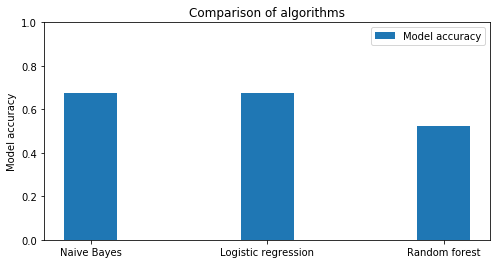

In [35]:
accuracy = [0.673,0.677,0.524]

labels = ['Naive Bayes', 'Logistic regression','Random forest']
x = np.arange(len(labels))  
width = 0.3 
fig, ax = plt.subplots(1, 1,  figsize=(8, 4))
g1 = ax.bar(x, accuracy, width, label='Model accuracy')

ax.set_ylabel('Model accuracy')
ax.set_title('Comparison of algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend();

Confusion Matrix

In [36]:
import sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm = confusion_matrix(Y_test, lr_pred)
cm


array([[154,   3,   1,   0,   0,   2,   3,   5,  15,   5,   1,   1,   4,
         12,  14,  61,   7,   9,   8,  14],
       [  5, 264,  21,   9,   7,  20,   6,   4,   8,   4,   0,   5,  16,
          6,  11,   1,   1,   1,   0,   0],
       [  8,  24, 232,  30,  15,  25,   9,   3,  19,   3,   1,   2,   2,
          5,  10,   2,   0,   0,   3,   1],
       [  0,  14,  36, 244,  34,   5,  11,   3,   8,   3,   0,   1,  30,
          1,   1,   0,   0,   0,   1,   0],
       [  0,  10,  11,  35, 254,   5,  11,   4,  15,   2,   2,   1,  27,
          4,   4,   0,   0,   0,   0,   0],
       [  0,  34,  30,   6,   8, 280,   4,   3,   8,   2,   0,   3,   8,
          0,   4,   0,   1,   2,   2,   0],
       [  2,   3,   3,  19,  14,   2, 301,  10,  13,   4,   0,   1,   9,
          1,   3,   1,   3,   0,   1,   0],
       [  4,   3,   1,   1,   0,   3,  12, 271,  49,   5,   1,   1,  26,
          2,   6,   1,   4,   1,   5,   0],
       [  4,   2,   0,   1,   1,   0,   8,  20, 315,   7,   0,  

Confusion Matrix using Seaborn

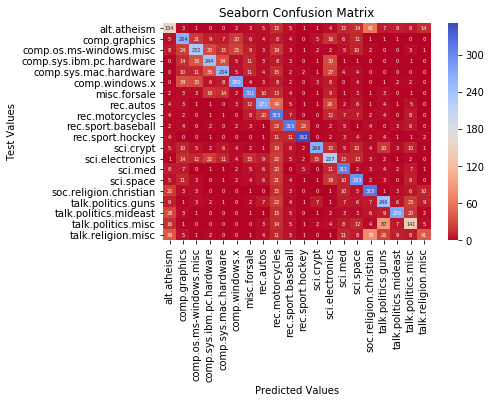

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(cm, annot=True, 
                  fmt='g', cbar=True, cmap = 'coolwarm_r', annot_kws = {'size':5});
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10, rotation=90)
cm = confusion_matrix(Y_test, lr_pred)
cm
ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Test Values');

ax.xaxis.set_ticklabels(train.target_names)
ax.yaxis.set_ticklabels(test.target_names)
plt.show()